In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
gdp_df = pd.read_csv(r"C:\Users\dougl\DA12\projects\un-python-Dkaplan8\data\gdp_percapita.csv")

In [3]:
gdp_df.head(1)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN


In [4]:
#How many rows and columns are in gdp_df? What are the data types of each column?

gdp_df.shape

(7662, 4)

In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [6]:
#Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.head(1)

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266


In [7]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [8]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


In [9]:
#How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?
gdp_df.loc[gdp_df['Year'].isna()]

,Country,Year,GDP_Per_Capita


In [33]:
gdp_df.isna().sum()
total_years_count = gdp_df['Year'].value_counts().sort_index()
print(total_years_count)

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: count, dtype: int64


In [11]:
#No missing values in dataset but not every country has data for the same years

C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


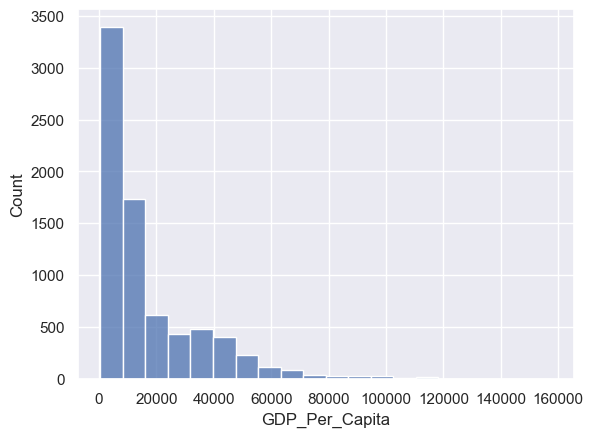

In [12]:
#Question 8
sns.set_theme(style='darkgrid')
sns.histplot(data=gdp_df, x='GDP_Per_Capita', bins=20)
plt.show()

C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


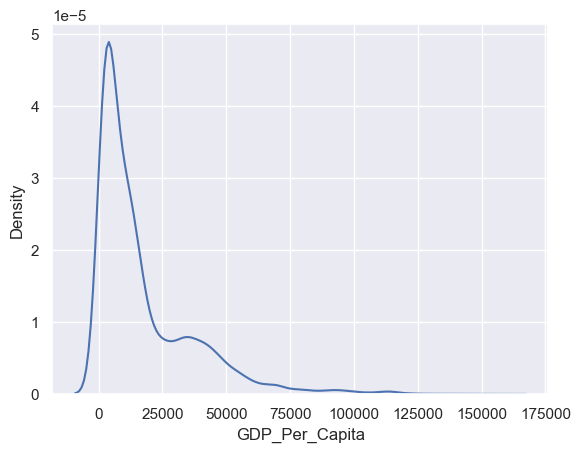

In [13]:
sns.kdeplot(gdp_df['GDP_Per_Capita'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

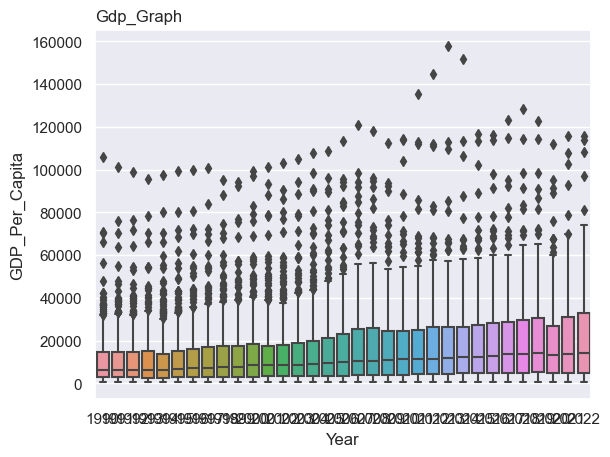

In [14]:
sns.boxplot(x=gdp_df['Year'], y=gdp_df['GDP_Per_Capita'])
plt.title('Gdp_Graph', loc='left')
plt.show

#ugly, look in walkthrough how to clean up

<function matplotlib.pyplot.show(close=None, block=None)>

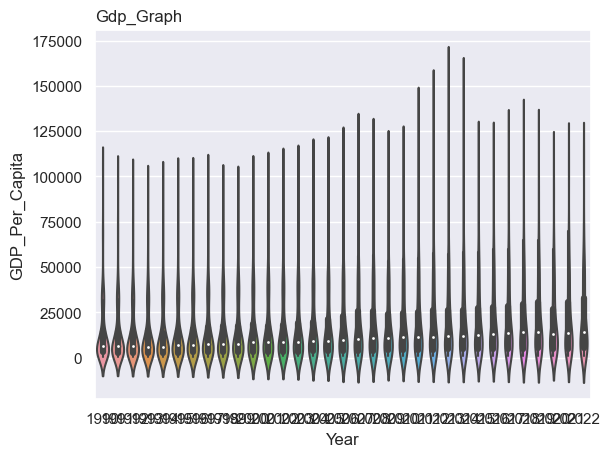

In [15]:
sns.violinplot(x=gdp_df['Year'], y=gdp_df['GDP_Per_Capita'])
plt.title('Gdp_Graph', loc='left')
plt.show

In [16]:
#hat was the median GDP per capita value in 2020?
gdp_2020_df = gdp_df[gdp_df['Year'] == 2020]
median_gdp_2020 = gdp_2020_df['GDP_Per_Capita'].median()
print(median_gdp_2020)

13357.997573370474


In [17]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

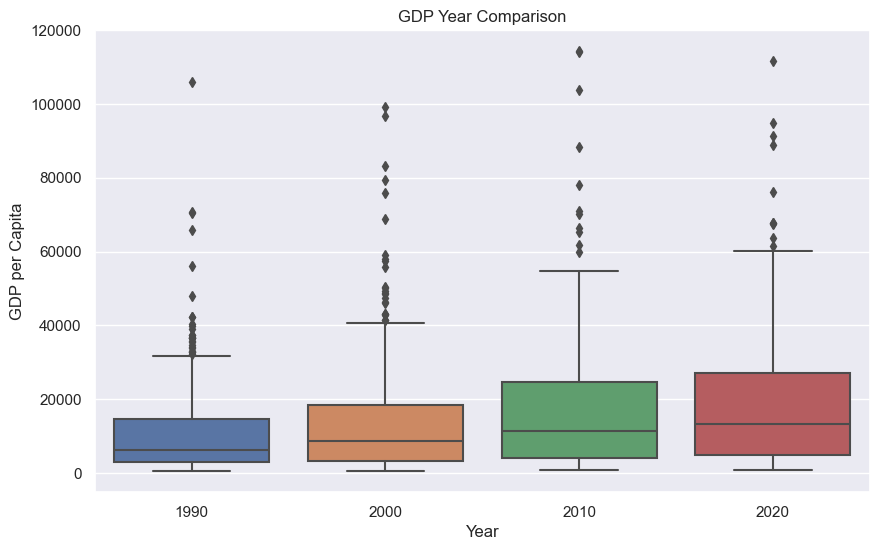

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.title('GDP Year Comparison')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

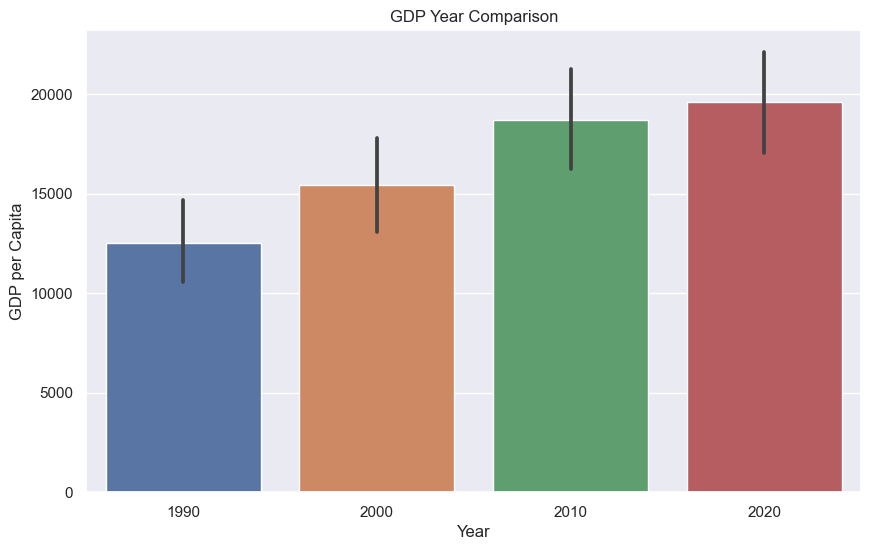

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.title('GDP Year Comparison')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

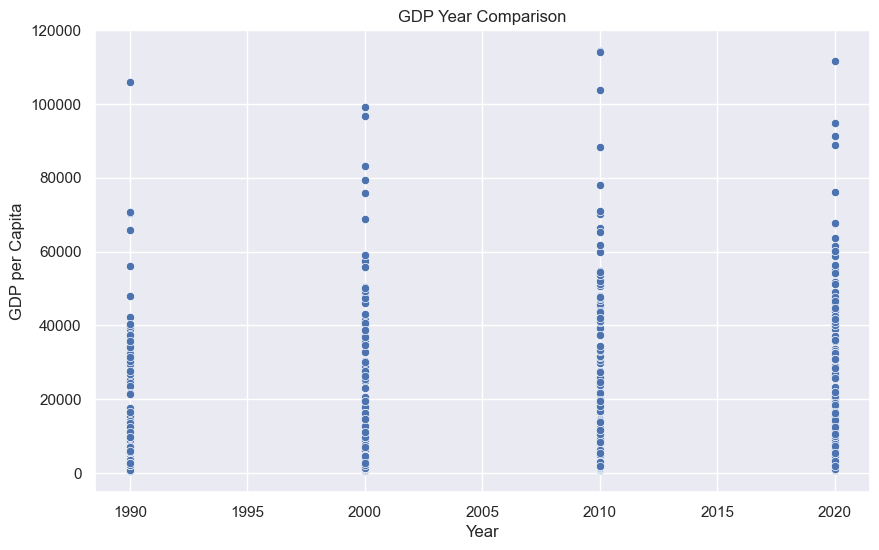

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.title('GDP Year Comparison')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

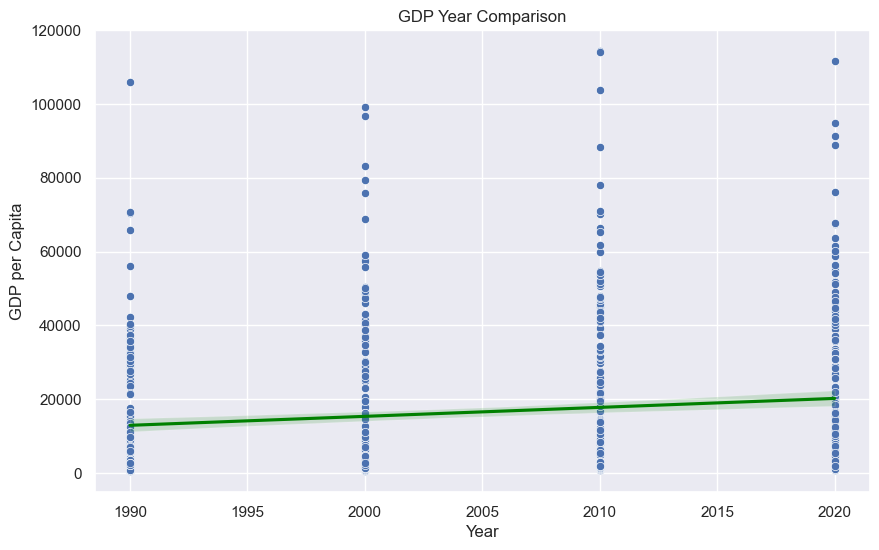

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
sns.regplot(data=gdp_decades, x='Year', y='GDP_Per_Capita', scatter=False, color='green')
plt.title('GDP Year Comparison')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

In [22]:
#Which country was the first to have a GDP per capita greater than $100,000?

In [29]:
hi_gdp_df = gdp_df[gdp_df['GDP_Per_Capita']>100000]

In [24]:
first_entry = hi_gdp_df.loc[hi_gdp_df['Year'].idxmin()]

In [25]:
first_country = first_entry['Country']

In [26]:
first_year = first_entry['Year']

In [27]:
first_gdp_per_capita = first_entry['GDP_Per_Capita']

In [28]:
print(first_country)

United Arab Emirates


In [30]:
#Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [31]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]